Sample model for Kaggle StateFarm distracted driver competition.

## Import required libraries (from VGG)

In [1]:
import theano
import keras

Using Theano backend.


In [2]:
from keras.preprocessing import image

## Create Sample Test and Valid data

In [3]:
path = '/Users/vviswanath/Downloads/statefarm/'

In [4]:
import os, sys
import numpy as np
import glob
import pandas as pd

In [16]:
%cd $path
%mkdir valid
%mkdir results
%mkdir -p sample/test
%mkdir -p sample/train
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown
%ls

/Users/vviswanath/Downloads/statefarm
results/ sample/  test/    train/   valid/


### Create validation set, the drivers in train set and validation set should be disjoint

In [7]:
img_driver_map = pd.read_csv(path+"driver_imgs_list.csv")
group_by_driver = img_driver_map.groupby('subject')
print(len(group_by_driver))
group_by_driver.count()

26


,classname,img
subject,,
p002,725,725
p012,823,823
p014,876,876
p015,875,875
p016,1078,1078
p021,1237,1237
p022,1233,1233
p024,1226,1226
p026,1196,1196


In [82]:
26*0.2

5.2

80% of 26 ~= 5.2 therefore include 5 drivers in validation set and remaining in training set

In [74]:
import random
drivers = group_by_driver.groups.keys()
random.shuffle(drivers)
valid_drivers = drivers[0:5]
print(valid_drivers)

['p016', 'p049', 'p012', 'p024', 'p026']


In [5]:
#for consistency
valid_drivers = ['p016', 'p049', 'p012', 'p024', 'p026']

In [8]:
valid_img_names = set(img_driver_map[img_driver_map['subject'].isin(valid_drivers)]['img'].tolist())

In [9]:
print(len(valid_img_names)/float(len(img_driver_map)))
#~= 20% as validation data

0.237870139137


### Create validation set

In [78]:
%cd $path/train
from PIL import Image
glob_pat = '*/*.jpg'
filelist = glob.glob(glob_pat)
print(filelist)
for fname in filelist:
    img_name = fname[fname.rfind("/")+1:]
    class_name = fname[0:fname.rfind("/")]
    if  img_name in valid_img_names:
        ddir = path+'valid/'+class_name
        if not os.path.exists(ddir):
            os.mkdir(ddir)
        os.rename(fname, ddir+os.sep+img_name)

/Users/vviswanath/Downloads/statefarm/train
['c0/img_100026.jpg', 'c0/img_10003.jpg', 'c0/img_100050.jpg', 'c0/img_100074.jpg', 'c0/img_10012.jpg', 'c0/img_100145.jpg', 'c0/img_100191.jpg', 'c0/img_100257.jpg', 'c0/img_100312.jpg', 'c0/img_100337.jpg', 'c0/img_100456.jpg', 'c0/img_1005.jpg', 'c0/img_100542.jpg', 'c0/img_100598.jpg', 'c0/img_100656.jpg', 'c0/img_100796.jpg', 'c0/img_100824.jpg', 'c0/img_100828.jpg', 'c0/img_10092.jpg', 'c0/img_100922.jpg', 'c0/img_101015.jpg', 'c0/img_101032.jpg', 'c0/img_101091.jpg', 'c0/img_101159.jpg', 'c0/img_101175.jpg', 'c0/img_101223.jpg', 'c0/img_101286.jpg', 'c0/img_101383.jpg', 'c0/img_101392.jpg', 'c0/img_10141.jpg', 'c0/img_101414.jpg', 'c0/img_101419.jpg', 'c0/img_101498.jpg', 'c0/img_101555.jpg', 'c0/img_101609.jpg', 'c0/img_101613.jpg', 'c0/img_101668.jpg', 'c0/img_10167.jpg', 'c0/img_101673.jpg', 'c0/img_101702.jpg', 'c0/img_10175.jpg', 'c0/img_101785.jpg', 'c0/img_101938.jpg', 'c0/img_10206.jpg', 'c0/img_10225.jpg', 'c0/img_10314.jpg', 

### Create samples

In [10]:
%cd $path'train'

/Users/vviswanath/Downloads/statefarm/train


In [31]:
#very small samples, to get the model working on CPU only mode
train_size=150
test_size=200
valid_size=100
'''
#sample sizes to be used while training with GPU,
train_size=1500
test_size=3000
valid_size=1000
'''

'\n#sample sizes to be used while training with GPU,\ntrain_size=1500\ntest_size=3000\nvalid_size=1000\n'

### Sample/Train

In [39]:
%cd $path/'train'

/Users/vviswanath/Downloads/statefarm/train


In [40]:
from shutil import copyfile
glob_pat = '*/*.jpg'
filelist = glob.glob(glob_pat)
shuf = np.random.permutation(filelist)
for i in range(train_size):
    pf = shuf[i]
    p = pf[0:pf.index('/')]
    f = pf[pf.index('/')+1:]
    ddir = path+'sample/train/'+p
    if not os.path.exists(ddir):
        os.mkdir(ddir)
    copyfile(pf, ddir+os.sep+f)

In [44]:
%cd $path/'valid'

/Users/vviswanath/Downloads/statefarm/valid


In [45]:
glob_pat = '*/*.jpg'
filelist = glob.glob(glob_pat)
shuf = np.random.permutation(filelist)
for i in range(valid_size):
    pf = shuf[i]
    p = pf[0:pf.index('/')]
    f = pf[pf.index('/')+1:]
    ddir = path+'sample/valid/'+p
    if not os.path.exists(ddir):
        os.mkdir(ddir)
    copyfile(pf, ddir+os.sep+f)

In [46]:
%cd $path/'test'

/Users/vviswanath/Downloads/statefarm/test


### Move all images in test under folder "unknown"(category)

In [48]:
%cd $path/'test'

/Users/vviswanath/Downloads/statefarm/test


In [90]:
if not os.path.exists(path+'test/unknown'):
    os.mkdir(path+'test/unknown')
glob_pat ='*.jpg'
filelist = glob.glob(glob_pat)
for f in filelist:
    fname = f[f.rfind('/')+1:]
    os.rename(f, path+'test/unknown/'+fname)

In [50]:
%cd $path'test'

/Users/vviswanath/Downloads/statefarm/test


In [51]:
glob_pat = '*/*.jpg'
filelist = glob.glob(glob_pat)
shuf = np.random.permutation(filelist)
for i in range(test_size):
    pf = shuf[i]
    p = pf[0:pf.index('/')]
    f = pf[pf.index('/')+1:]
    ddir = path+'sample/test/'+p
    if not os.path.exists(ddir):
        os.mkdir(ddir)
    copyfile(pf, ddir+os.sep+f)

## Load data

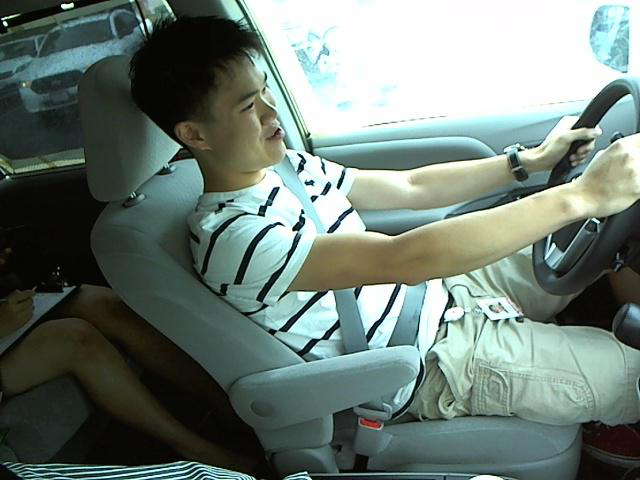

In [70]:
img_1 = img_driver_map['img'].values[0]
sub = img_driver_map[img_driver_map['img']==img_1]['subject'].values[0]
class_name = img_driver_map[img_driver_map['img']==img_1]['classname'].values[0]
sub_dir = 'train/'
if sub in valid_drivers:
    sub_dir = 'valid/'
img = image.load_img(path + sub_dir+class_name+os.sep+img_1)
img

In [71]:
img_size = img.size
img_size

(640, 480)

In [112]:
gen=image.ImageDataGenerator()

In [134]:
train_batches = gen.flow_from_directory(path+'sample/train', target_size=img_size, batch_size=2, shuffle=True,
                                        class_mode='categorical')

Found 150 images belonging to 10 classes.


In [135]:
valid_batches = gen.flow_from_directory(path+'sample/valid', target_size=img_size, batch_size=2, shuffle=True,
                                       class_mode='categorical')

Found 100 images belonging to 10 classes.


In [168]:
valid_batches.image_shape

(640, 480, 3)

In [136]:
from keras.utils.np_utils import to_categorical
train_classes = to_categorical(train_batches.classes)
valid_classes = to_categorical(valid_batches.classes)

## Create model

In [226]:
from keras.models import Sequential
from keras.layers.convolutional import ZeroPadding2D, Convolution2D
from keras.layers import Dense, Dropout, Flatten

In [244]:
model = Sequential()
model.add(ZeroPadding2D((1,1), input_shape=(640, 480, 3)))
model.add(Convolution2D(6, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(10))

(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)


In [245]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [246]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_10 (ZeroPadding2D) (None, 642, 482, 3)   0           zeropadding2d_input_9[0][0]      
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 640, 480, 6)   168         zeropadding2d_10[0][0]           
____________________________________________________________________________________________________
flatten_6 (Flatten)              (None, 1843200)       0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
dense_24 (Dense)                 (None, 10)            18432010    flatten_6[0][0]                  
Total params: 18,432,178
Trainable params: 18,432,178
Non-trainable params: 0
_____________

Reference-style: 
![alt text][logo]

[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

[conv_model_1]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Model architecture"

In [233]:
model.fit_generator(train_batches, train_batches.nb_sample, nb_epoch=2, validation_data=valid_batches, nb_val_samples=valid_batches.nb_sample)

Epoch 1/2
150/150 [==============================] - 39s - loss: 8.4597 - acc: 0.0800 - val_loss: 10.3156 - val_acc: 0.0800
Epoch 2/2
150/150 [==============================] - 37s - loss: 9.6938 - acc: 0.0867 - val_loss: 10.4768 - val_acc: 0.0800
